#                                         Lending Club Loan Data

## Import Data

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\16473\miniconda3

In [2]:
SAMPLE = True

In [3]:
loans = pd.read_csv('../project_1/accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=True) #Load data into pandas

if SAMPLE:
    loans = loans.sample(frac=0.01)

C:\Users\16473\miniconda3\envs\sm-202011\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22607 entries, 677200 to 67314
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 26.2+ MB


In [5]:
pd.options.display.float_format = '{:,.2f}'.format 

In [6]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
677200,79432147,nan,"7,000.00","7,000.00","7,000.00",36 months,9.16,223.12,B,B2,Driver,3 years,MORTGAGE,"55,000.00",Not Verified,Jun-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=79432147,NaN,credit_card,Credit card refinancing,395xx,MS,9.23,0.00,Sep-2004,660.00,664.00,0.00,52.00,87.00,6.00,1.00,"5,021.00",90.00,16.00,w,0.00,0.00,"7,471.28","7,471.28","7,000.00",471.28,0.00,0.00,0.00,Mar-2017,"5,689.88",NaN,Sep-2017,679.00,675.00,0.00,58.00,1.00,Individual,nan,nan,NaN,0.00,0.00,"167,237.00",2.00,2.00,1.00,1.00,2.00,"53,610.00",78.00,0.00,1.00,"3,489.00",90.00,"5,550.00",0.00,0.00,0.00,3.00,"27,872.00","2,525.00",91.00,0.00,0.00,108.00,140.00,13.00,2.00,1.00,31.00,nan,13.00,nan,0.00,2.00,3.00,3.00,3.00,10.00,3.00,5.00,3.00,6.00,nan,0.00,0.00,1.00,88.00,100.00,1.00,0.00,"183,988.00","58,631.00","5,050.00","68,502.00",nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1955599,89835102,nan,"24,000.00","24,000.00","24,000.00",60 months,13.99,558.32,C,C3,Sales Director,2 years,MORTGAGE,"120,000.00",Verified,Sep-2016,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=89835102,NaN,credit_card,Credit card refinancing,440xx,OH,31.08,1.00,Mar-1991,675.00,679.00,1.00,23.00,nan,22.00,0.00,"95,455.00",67.00,43.00,w,"14,065.36","14,065.36","16,730.95","16,730.95","9,934.64","6,796.31",0.00,0.00,0.00,Mar-2019,558.32,Apr-2019,Mar-2019,779.00,775.00,0.00,nan,1.00,Individual,nan,nan,NaN,0.00,0.00,"415,397.00",0.00,1.00,0.00,1.00,23.00,"1

In [7]:
loans.shape

(22607, 151)

## Target Variable

The Target Variable in this loan data is "Loan_Status", which we focus more on either loan status is "Fully Paid" or Charged Off. Will check on value counts of "Loan_Status" variable.

In [8]:
loans['loan_status'].value_counts(dropna=False) 

Fully Paid                                             10845
Current                                                 8650
Charged Off                                             2738
Late (31-120 days)                                       204
In Grace Period                                           91
Late (16-30 days)                                         45
Does not meet the credit policy. Status:Fully Paid        26
Does not meet the credit policy. Status:Charged Off        8
Name: loan_status, dtype: int64

Will exclude the loans which status are in Current,Late (31-120 days),In Grace Period,Late (16-30 days),Does not meet the credit policy. Status:Fully Paid,Does not meet the credit policy. Status:Charged Off,Default and missing status

In [9]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])] #Ignore other loan_status

Loan_Status counts as percentages

In [10]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64

80% are Fully Paid, 20% are Charged Off 

## Data Preparation

Drop columns with >30% data missing

Calculate the missing data percentages of each feature

In [11]:
missing_data = loans.isnull().mean().sort_values(ascending=False) #calculate % of missing data

In [12]:
drop_list = sorted(list(missing_data[missing_data > 0.3].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [13]:
len(drop_list) #Missing data >30% columns

58

In [14]:
loans.drop(labels=drop_list, axis=1, inplace=True) # Drop columns

### Keep variables needed for Investors

In [15]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [16]:
len(keep_list)

31

In [17]:
drop_list = [col for col in loans.columns if col not in keep_list]
print(drop_list) #List remaining features not needed for investors

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc

In [18]:
len(drop_list)

62

In [19]:
loans.drop(labels=drop_list, axis=1, inplace=True) #Drop Features

In [20]:
loans.shape #Remaining Columns

(13583, 31)

## Exploratory Data Analysis

Check dtypes of columns 

In [21]:
loans.dtypes

id                       object
loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
earliest_cr_line         object
fico_range_low          float64
fico_range_high         float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: o

In [22]:
loans.select_dtypes(include=np.object).columns.tolist() # Object data type columns

['id',
 'term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

In [23]:
loans.select_dtypes(include=np.float).columns.tolist() # Float data type columns

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

### Analyzing Categorical data

id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status',
'issue_d', 'loan_status', 'purpose', 'title',  'zip_code', 'addr_state',  'earliest_cr_line', 'initial_list_status',
'application_type'

#### Id

In [24]:
loans['id'].describe() #Usually ID's are unique and independent keys

count        13583
unique       13583
top       63374284
freq             1
Name: id, dtype: int64

In [25]:
loans.drop('id', axis=1, inplace=True) #drop id

#### Term

In [26]:
loans['term'].value_counts(dropna=False)

 36 months    10396
 60 months     3187
Name: term, dtype: int64

In [27]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0])) #convert them into numericals

In [28]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36   0.16
60   0.33
Name: loan_status, dtype: float64

Charge off rates for 60 months are 2x higher than for 36 months term

#### Grade and Sub Grade

In [29]:
print(sorted(loans['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [30]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


Both are same, drop one column either grade or sub grade, I am dropping grade column here

In [31]:
loans.drop('grade', axis=1, inplace=True) #Drop grade

In [32]:
def plot_var(col_name, full_name, continuous):  # plot function
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

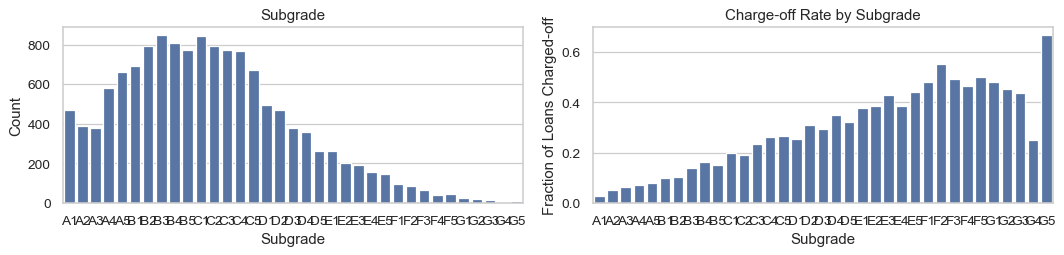

In [33]:
plot_var('sub_grade', 'Subgrade', continuous=False)

From the above plot, we can find that charge off rates increases with sub grade

#### Employment title

In [34]:
loans['emp_title'].describe()

count       12712
unique       7969
top       Teacher
freq          208
Name: emp_title, dtype: object

In [35]:
loans.drop(labels='emp_title', axis=1, inplace=True) #too many unique values

#### Employment length

In [36]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year        932
10+ years    4472
2 years      1233
3 years      1068
4 years       827
5 years       829
6 years       699
7 years       572
8 years       616
9 years       508
< 1 year     1035
NaN           792
Name: emp_length, dtype: int64

Remove years from emp_length variables and convert them into float

In [37]:
loans['emp_length'].replace('< 1 year', '0 years', inplace=True) #Replace 0 years with 1 year

In [38]:
loans['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True) # Replace 10+years with 10 years

In [39]:
def emp_length_to_int(s):
    if pd.isnull(s): 
        return s
    else:
        return np.int8(s.split()[0])

In [40]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

In [41]:
loans['emp_length'] = loans['emp_length'].fillna(loans.emp_length.median()) # fill missing values by taking median imputation

In [42]:
loans['emp_length'].value_counts(dropna=False).sort_index()

0.00     1035
1.00      932
2.00     1233
3.00     1068
4.00      827
5.00      829
6.00     1491
7.00      572
8.00      616
9.00      508
10.00    4472
Name: emp_length, dtype: int64

In [43]:
loans.groupby('emp_length')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

emp_length
0.00    0.19
1.00    0.21
2.00    0.20
3.00    0.21
4.00    0.23
5.00    0.18
6.00    0.22
7.00    0.20
8.00    0.20
9.00    0.18
10.00   0.20
Name: loan_status, dtype: float64

Charge off rates are decreasing when employment length increases

#### Home Ownership

In [44]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    6711
RENT        5364
OWN         1499
OTHER          5
ANY            3
NONE           1
Name: home_ownership, dtype: int64

We can merge None, Any as Other

In [45]:
loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [46]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    6711
RENT        5364
OWN         1499
OTHER          9
Name: home_ownership, dtype: int64

In [47]:
home_ownership_xt = pd.crosstab(loans['home_ownership'], loans['loan_status'])
home_ownership_xt #Cross table

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,1202,5509
OTHER,3,6
OWN,313,1186
RENT,1220,4144


Text(0, 0.5, 'Loan Status')

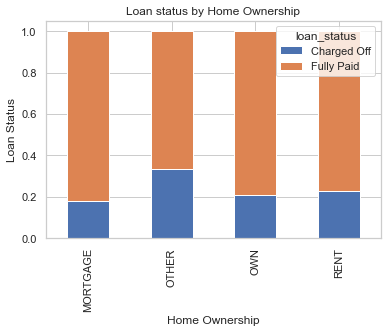

In [48]:
home_ownership_xt_pct = home_ownership_xt.div(home_ownership_xt.sum(1).astype(float), axis=0)

home_ownership_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Loan status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status')

Charge off rates are higher for Rent and Own home owner ship with 23% and 21% respectively

In [49]:
loans.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE   0.18
OTHER      0.33
OWN        0.21
RENT       0.23
Name: loan_status, dtype: float64

#### Verification Status

In [50]:
loans.groupby('verification_status')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

verification_status
Not Verified      0.14
Source Verified   0.21
Verified          0.25
Name: loan_status, dtype: float64

Charge off rates are higher for Verified compared to other two types

#### Purpose

In [51]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    6711
RENT        5364
OWN         1499
OTHER          9
Name: home_ownership, dtype: int64

In [52]:
loans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

purpose
car                  0.16
credit_card          0.17
debt_consolidation   0.21
home_improvement     0.19
house                0.16
major_purchase       0.20
medical              0.25
moving               0.25
other                0.21
renewable_energy     0.25
small_business       0.33
vacation             0.15
wedding              0.09
Name: loan_status, dtype: float64

#### Title

In [53]:
loans['title'].describe()

count                  13418
unique                  1164
top       Debt consolidation
freq                    6682
Name: title, dtype: object

In [54]:
loans['title'].value_counts(normalize=True, dropna=False)

Debt consolidation                                                  0.49
Credit card refinancing                                             0.19
Home improvement                                                    0.06
Other                                                               0.05
Major purchase                                                      0.02
NaN                                                                 0.01
Debt Consolidation                                                  0.01
Car financing                                                       0.01
Medical expenses                                                    0.01
Business                                                            0.01
Moving and relocation                                               0.01
Vacation                                                            0.01
Home buying                                                         0.00
debt consolidation                                 

Purpose and Title are quite similar so we can drop either one column

In [55]:
loans.drop('title', axis=1, inplace=True)

#### Zip code and Address state 

In [56]:
loans['zip_code'].describe()

count     13583
unique      816
top       945xx
freq        168
Name: zip_code, dtype: object

In [57]:
loans['addr_state'].sample(5)

1929746    NY
1056839    AZ
44390      NE
125418     MD
1293336    NY
Name: addr_state, dtype: object

In [58]:
loans['addr_state'].nunique()

50

Zip code and address are quite similar which tells about address of applicant, so we will drop one column with more unique values

In [59]:
loans.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
WY   0.04
ID   0.06
MT   0.07
NH   0.10
ME   0.11
DC   0.11
OR   0.12
CO   0.15
WA   0.15
IL   0.16
UT   0.17
OK   0.17
SC   0.17
KY   0.17
CT   0.17
NM   0.18
WV   0.18
KS   0.19
OH   0.19
AR   0.19
NJ   0.19
MN   0.19
RI   0.19
AZ   0.19
AK   0.19
IN   0.20
TX   0.20
CA   0.20
PA   0.20
VA   0.20
DE   0.21
WI   0.21
NC   0.22
GA   0.22
NY   0.22
TN   0.22
MO   0.22
FL   0.22
LA   0.23
VT   0.23
HI   0.23
MI   0.24
AL   0.24
MA   0.24
NV   0.25
ND   0.25
MD   0.26
MS   0.29
SD   0.30
NE   0.36
Name: loan_status, dtype: float64

MS state having highest charge off rates with 26%

In [60]:
loans.drop(labels='zip_code', axis=1, inplace=True)

#### Initial list status

In [61]:
loans['initial_list_status'].describe()

count     13583
unique        2
top           w
freq       7919
Name: initial_list_status, dtype: object

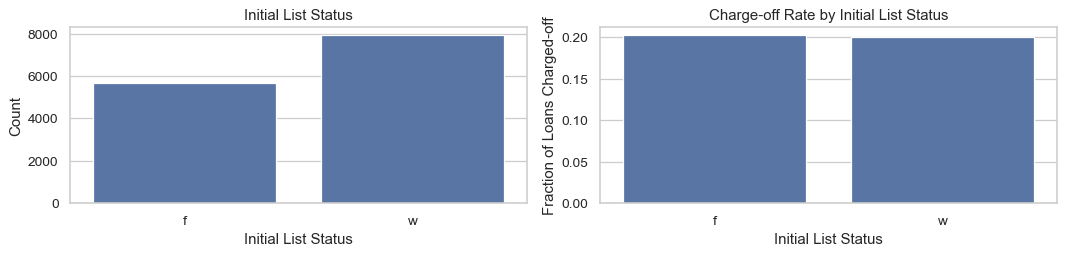

In [62]:
plot_var('initial_list_status', 'Initial List Status', continuous=False)

Charge off rates for "w" and "f" status are similar with 20%

#### Application type

In [63]:
loans['application_type'].value_counts(normalize=True)

Individual   0.98
Joint App    0.02
Name: application_type, dtype: float64

In [64]:
loans.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual   0.20
Joint App    0.29
Name: loan_status, dtype: float64

2% Loan applicants are Joint application types which are having 25% of charge off rates 

### Analyzing Numerical Data

#### Loan amount

In [65]:
loans['loan_amnt'].describe()

count   13,583.00
mean    14,457.96
std      8,812.54
min        950.00
25%      7,800.00
50%     12,000.00
75%     20,000.00
max     40,000.00
Name: loan_amnt, dtype: float64

In [66]:
loans['loan_amnt'] = loans['loan_amnt'].apply(lambda x: np.log10(x+1)) #applying log10 to calculate numerical value

In [67]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,738.00",4.12,0.30,3.00,3.95,4.17,4.34,4.60
Fully Paid,"10,845.00",4.06,0.31,2.98,3.87,4.08,4.30,4.60


#### Interest Rate

In [68]:
loans['int_rate'].describe()

count   13,583.00
mean        13.16
std          4.76
min          5.31
25%          9.67
50%         12.69
75%         15.99
max         30.99
Name: int_rate, dtype: float64

In [69]:
loans.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,738.00",15.76,4.93,5.31,12.49,15.05,18.97,30.99
Fully Paid,"10,845.00",12.51,4.49,5.31,9.16,11.99,15.05,30.99


In [70]:
loans.groupby('purpose')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
car,173.00,11.41,4.63,5.32,7.62,10.75,13.67,25.34
credit_card,"2,974.00",11.62,4.21,5.31,8.18,10.99,13.99,30.84
debt_consolidation,"7,884.00",13.60,4.73,5.31,10.15,13.11,16.29,30.99
educational,1.00,11.14,nan,11.14,11.14,11.14,11.14,11.14
home_improvement,901.00,13.05,4.86,5.31,9.49,12.74,15.99,30.89
house,69.00,15.17,5.41,5.32,10.99,15.61,18.84,25.80
major_purchase,284.00,12.20,5.10,5.32,7.90,11.47,15.24,30.94
medical,143.00,14.82,4.70,5.31,11.49,14.49,17.57,30.65
moving,102.00,14.13,5.25,5.32,10.49,13.53,16.99,29.49


In [71]:
loans.groupby('sub_grade')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
sub_grade,,,,,,,,
A1,471.00,5.57,0.34,5.31,5.32,5.32,6.03,7.05
A2,391.00,6.52,0.31,5.79,6.24,6.49,6.62,7.40
A3,380.00,7.14,0.33,6.68,6.89,6.99,7.59,8.00
A4,579.00,7.51,0.34,6.54,7.26,7.49,7.90,9.32
A5,664.00,8.19,0.42,6.00,7.89,7.97,8.39,9.63
B1,692.00,8.95,0.73,6.00,8.24,8.67,9.67,11.14
B2,792.00,9.94,0.73,9.16,9.17,9.93,10.53,11.48
B3,847.00,10.72,0.83,9.62,9.99,10.49,11.39,12.12
B4,808.00,11.49,0.81,6.00,10.99,10.99,11.67,13.11


#### Installment

In [72]:
loans['installment'].describe()

count   13,583.00
mean       440.05
std        265.61
min         30.33
25%        246.88
50%        372.71
75%        587.69
max      1,479.87
Name: installment, dtype: float64

In [73]:
loans.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,738.00",478.04,276.43,31.88,275.40,406.24,641.53,"1,479.87"
Fully Paid,"10,845.00",430.46,261.95,30.33,239.56,364.73,573.97,"1,451.12"


#### Annual Income

In [74]:
loans['annual_inc'].describe()

count      13,583.00
mean       76,682.01
std        54,904.87
min             0.00
25%        46,000.00
50%        65,000.00
75%        90,142.50
max     1,300,000.00
Name: annual_inc, dtype: float64

In [75]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))

In [76]:
loans.drop('annual_inc', axis=1, inplace=True)

In [77]:
loans['log_annual_inc'].describe()

count   13,583.00
mean         4.82
std          0.24
min          0.00
25%          4.66
50%          4.81
75%          4.95
max          6.11
Name: log_annual_inc, dtype: float64

In [78]:
loans.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,738.00",4.79,0.24,2.70,4.65,4.78,4.93,5.74
Fully Paid,"10,845.00",4.82,0.24,0.00,4.67,4.81,4.97,6.11


#### Debt to Income ratio

In [79]:
loans['dti'].describe()

count   13,582.00
mean        18.32
std         14.20
min          0.00
25%         11.85
50%         17.62
75%         24.05
max        999.00
Name: dti, dtype: float64

In [80]:
loans.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,738.00",20.62,26.59,0.00,13.43,19.59,26.20,999.00
Fully Paid,"10,844.00",17.74,8.51,0.00,11.50,17.06,23.47,97.00


#### FICO range

In [81]:
loans[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,"13,583.00","13,583.00"
mean,696.46,700.46
std,32.21,32.21
min,660.00,664.00
25%,670.00,674.00
50%,690.00,694.00
75%,710.00,714.00
max,845.00,850.00


In [82]:
loans[['fico_range_low','fico_range_high']].corr() #Calculating correlation

,fico_range_low,fico_range_high
fico_range_low,1.00,1.00
fico_range_high,1.00,1.00


In [83]:
loans['fico_score'] = 0.5*loans['fico_range_low'] + 0.5*loans['fico_range_high']

In [84]:
loans.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

In [85]:
loans.groupby('loan_status')['fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,738.00",690.00,25.99,662.00,672.00,682.00,702.00,837.00
Fully Paid,"10,845.00",700.60,33.26,662.00,677.00,692.00,717.00,847.50


#### Open credit lines and Total accounts

In [86]:
loans[['open_acc','total_acc']].corr()

,open_acc,total_acc
open_acc,1.00,0.70
total_acc,0.70,1.00


In [87]:
loans.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,738.00",11.85,5.71,1.00,8.00,11.00,14.00,75.00
Fully Paid,"10,845.00",11.48,5.41,1.00,8.00,11.00,14.00,79.00


In [88]:
loans['acc_ratio'] = loans['open_acc'] / loans['total_acc']

In [89]:
loans.drop(['total_acc','open_acc'], axis=1, inplace=True)

#### Public records and Public records brankrupticies

In [90]:
loans[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.00,0.64
pub_rec_bankruptcies,0.64,1.00


In [91]:
loans.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,738.00",0.24,0.61,0.00,0.00,0.00,0.00,11.00
Fully Paid,"10,845.00",0.21,0.60,0.00,0.00,0.00,0.00,20.00


In [92]:
loans['pub_rec_bankruptcies'].value_counts().sort_index()

0.00    11919
1.00     1560
2.00       76
3.00       18
4.00        3
5.00        2
Name: pub_rec_bankruptcies, dtype: int64

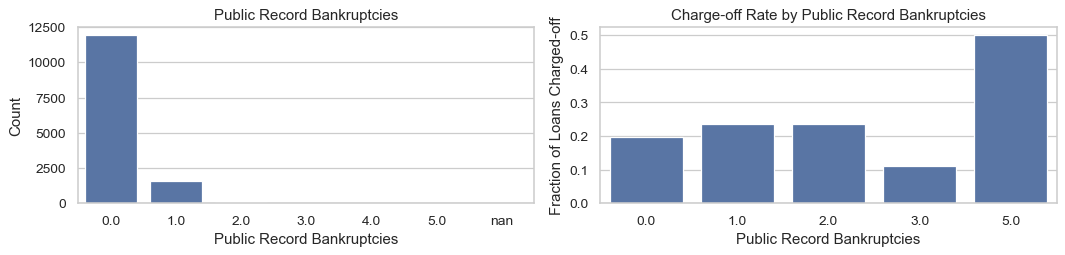

In [93]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

In [94]:
loans.drop('pub_rec', axis=1, inplace=True)

#### Revolving balance

In [95]:
loans['revol_bal'].describe()

count    13,583.00
mean     16,178.01
std      23,100.86
min           0.00
25%       5,950.50
50%      11,196.00
75%      19,664.50
max     824,328.00
Name: revol_bal, dtype: float64

In [96]:
loans['log_revol_bal'] = loans['revol_bal'].apply(lambda x: np.log10(x+1))

In [97]:
loans.drop('revol_bal', axis=1, inplace=True)

#### Revolving util

In [98]:
loans['revol_util'].describe()

count   13,572.00
mean        51.74
std         24.83
min          0.00
25%         33.30
50%         51.80
75%         71.20
max        154.30
Name: revol_util, dtype: float64

In [99]:
loans[['revol_util','fico_score']].corr()

,revol_util,fico_score
revol_util,1.00,-0.47
fico_score,-0.47,1.00


In [100]:
loans.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,735.00",55.10,24.20,0.00,37.90,56.80,74.05,145.00
Fully Paid,"10,837.00",50.90,24.92,0.00,32.30,50.70,70.30,154.30


#### Mortgage account

In [101]:
loans['mort_acc'].describe()

count   13,114.00
mean         1.68
std          2.01
min          0.00
25%          0.00
50%          1.00
75%          3.00
max         24.00
Name: mort_acc, dtype: float64

In [102]:
loans.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"2,681.00",1.40,1.82,0.00,0.00,1.00,2.00,12.00
Fully Paid,"10,433.00",1.75,2.05,0.00,0.00,1.00,3.00,24.00


### Date type columns

In [103]:
loans['issue_d'].sample(5)

156406     Aug-2015
505658     Jan-2018
2178879    Dec-2016
688105     May-2016
1197635    Sep-2014
Name: issue_d, dtype: object

In [104]:
loans['earliest_cr_line'].sample(5)

1224893    Apr-1993
713076     Sep-1998
2022411    Oct-2007
1331536    Dec-2002
466749     Mar-1995
Name: earliest_cr_line, dtype: object

In [105]:
loans['earliest_cr_line'].isnull().any()

False

In [106]:
loans['issue_d'].isnull().any()

False

In [107]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'])

Text(0.5, 1.0, 'Loans Funded per Year')

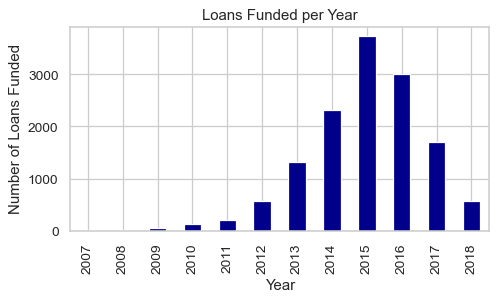

In [108]:
plt.figure(figsize=(6,3), dpi=90)
loans['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

In [109]:
loans['earliest_cr_line'] = pd.to_datetime(loans['earliest_cr_line'])

Calculate number of days between issue date and earliest credit lines, so that we know the days of applicant with the bank

In [110]:
loans['days_from_issue_to_earliest_cr'] = (loans['issue_d'] - loans['earliest_cr_line']).apply(lambda x: x.days)

In [111]:
loans['days_from_issue_to_earliest_cr'].sample(5)

1132860     4567
1106045     2922
1761815    10806
217532      8888
931707      7213
Name: days_from_issue_to_earliest_cr, dtype: int64

In [112]:
loans['target'] = (loans['loan_status'] == 'Charged Off').astype(int)
loans['target'].describe()

count   13,583.00
mean         0.20
std          0.40
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: target, dtype: float64

In [113]:
_df = loans.groupby('days_from_issue_to_earliest_cr')['target'].mean().reset_index()

<AxesSubplot:xlabel='days_from_issue_to_earliest_cr', ylabel='target'>

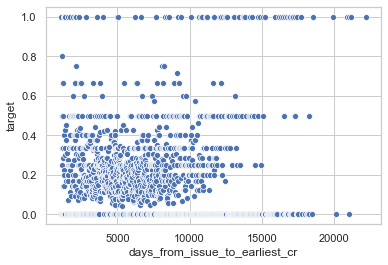

In [114]:
sns.scatterplot(x='days_from_issue_to_earliest_cr', y='target', data=_df)

In [115]:
_df.corr()

,days_from_issue_to_earliest_cr,target
days_from_issue_to_earliest_cr,1.00,-0.05
target,-0.05,1.00


In [116]:
loans.drop(['target','earliest_cr_line'],axis=1,inplace=True)

#### More Pre preprocessing

Convert charge off in loan status as 0/1 indicator

In [117]:
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

In [118]:

missing_fractions = loans.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable

In [119]:

print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data

mort_acc               0.03
revol_util             0.00
pub_rec_bankruptcies   0.00
dti                    0.00
dtype: float64


In [120]:

print(loans.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'revol_util', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'log_annual_inc', 'fico_score', 'acc_ratio', 'log_revol_bal',
       'days_from_issue_to_earliest_cr', 'charged_off'],
      dtype='object')


Create dummy variables for categorical data

In [121]:
loans = pd.get_dummies(loans, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status','application_type'], drop_first=True)



In [122]:
loans.shape

(13583, 119)

In [123]:
import pyarrow.feather as feather
feather.write_feather(loans,'./loans_modelling_data')